## Discussion 1: Plotting in Python

Thursday, we watched a [TED talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen#t-290048), which discussed biases we as people have about data and the importance of looking at data with good data visualization. 

Today, we will use Python to generate an image from this talk, but with data from 2021.  The data we will use to do this is from [Our World in Data: Fertility Rate](https://ourworldindata.org/fertility-rate).

We will generate shows fertility vs child mortality for countries across the world. 
<img src="fertility-vs-child-mortality.png" width="600">

**Note 3 relevant details about this plot:**
1) Each data point is color-coded by the region of the world the country is in. The legend in the top right indicates which color corresponds to which region.
2) The size of each data point reflects the total population of each country.  The larger the circle, the more populous the country.
3) The name of each country is labeled next to each data point and colored by the region in the world the country is in.

### Step 1: 
Download the data from our CatCourse page and load it into this Jupyter notebook. The data comes in a csv file (csv = comma separated variable). 

***We will use pandas to load the data.***  
Pandas is a Python package that provides fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. 

***We will use matplotlib.pyplot for generating plots.***
matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

<span style="color:red">More advanced users:</span> For those of you who are used to using %matplotlib inline to render plots in Jupyter notebook, this is not necessary when you import matplotlib.pyplot as plt. See this [Twitter thread](https://twitter.com/tedpetrou/status/1238812794218307590?lang=en) for an explanation.

<span style="color:magenta">Beginners:</span> A great very basic tutorial for plotting with matplotlib.pyplot can be found [here](https://www.data-blogger.com/2017/11/15/python-matplotlib-pyplot-a-perfect-combination/).
This includes code, plots that code generates, and several explanatory videos (found at the bottom of the page).
Another great pylab plotting tutorial can be found [here](https://matplotlib.org/stable/tutorials/introductory/pyplot.html). This tutorial has a wider range of examples than the first tutorial.

In [1]:
#packages like pandas, numpy, astroML need to be loaded once at the beginning of each notebook
#an import statement is the way Python code in one module gains access to the code in another module.

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

We will use pandas to load our data into a **DataFrame**.
A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

In [2]:
dataframe = pd.read_csv (r'fertility-vs-child-mortality.csv') #this line loads the data into an object named dataframe

Now, let's look at the data we have loaded.  

In [3]:
dataframe #you can see the contents of any object, including DataFrames, if you enter just the object's name (here was have called it dataframe)

,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,7.2484,41.940210,7480464.0,NaN
2,Afghanistan,AFG,1951,7.2596,41.630490,7571542.0,NaN
3,Afghanistan,AFG,1952,7.2601,40.986248,7667534.0,NaN
4,Afghanistan,AFG,1953,7.2662,40.335840,7764549.0,NaN
...,...,...,...,...,...,...,...
58666,Zimbabwe,ZWE,1945,NaN,NaN,2519116.0,NaN
58667,Zimbabwe,ZWE,1946,NaN,NaN,2567459.0,NaN
58668,Zimbabwe,ZWE,1947,NaN,NaN,2616729.0,NaN
58669,Zimbabwe,ZWE,1948,NaN,NaN,2666945.0,NaN


In [4]:
dataframe.keys() #The keys() method will displays a list of all the keys (column names) of data in the dataframe object

Index(['Entity', 'Code', 'Year',
       'Fertility rate - Sex: all - Age: all - Variant: estimates',
       'Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

See how there are lots of places where the are **'Nan'** entries? 
Let's get rid of any rows where the population is 'Nan' for simplicity for now.

In [5]:
mask_Nan = dataframe['Population (historical estimates)' 
                 and 'Fertility rate - Sex: all - Age: all - Variant: estimates' 
                 and 'Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates'].notnull() 

#print(mask_Nan)        # uncomment if you want to see what mask contains -- True or False if the criteria is met for each row of data
df = dataframe[mask_Nan] # df will only contain the rows of data from dataframe that are `True' in the mask.

Let's doublecheck and see how **df** is different than **dataframe**.  
Remember, df only has data stored in it that was labeled as 'True' in mask_Nan.  What do you expect to see?

Now, let's explore another way to look at a list of the **column names**.  

In [6]:
list(df.columns) #this line let's us see the name of column of data -- what is similar or different from dataframe.keys() from above

['Entity',
 'Code',
 'Year',
 'Fertility rate - Sex: all - Age: all - Variant: estimates',
 'Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates',
 'Population (historical estimates)',
 'Continent']

I want to see what is inside **one column of data** - the 'Entity' column now.  
Note, I can see the contents of any column of df by putting [] next to it with the name of the column inside the square brackets.    

In [7]:
df['Entity'] #this let's us see what is inside the 'Entity' column of data

1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
5        Afghanistan
            ...     
58479       Zimbabwe
58480       Zimbabwe
58481       Zimbabwe
58482       Zimbabwe
58483       Zimbabwe
Name: Entity, Length: 18360, dtype: object

***What if I want to look only at one entry in a column of data?***  I can do this by adding another set of [] and this time including the index of the entry I am interested in.  

***What is an index?***
An index in Python is a way to refer to an individual item within an array (or any iterable object) **by its position in the array**. In other words, you can directly access your elements of choice within an iterable and do various operations depending on your needs.

In Python, objects are **“zero-indexed”** meaning the position count starts at zero. Many other programming languages follow the same pattern. 

So, if there are 5 elements present within a list. Then the first element (i.e. the leftmost element) holds the “zeroth” place, followed by the elements in first, second, third, and fourth positions.

***Now let's look just at the third entry of the 'Entity' column.***

In [8]:
df['Entity'][2]

'Afghanistan'

I like to **make column of indices called 'index'** that I can access in the same way I select other columns of data.  
There are several ways to do this, but I like including the line of code below.

In [9]:
df.reset_index(level=0, inplace=True) #makes a column called 'index'
df

,index,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates,Population (historical estimates),Continent
0,1,Afghanistan,AFG,1950,7.2484,41.940210,7480464.0,NaN
1,2,Afghanistan,AFG,1951,7.2596,41.630490,7571542.0,NaN
2,3,Afghanistan,AFG,1952,7.2601,40.986248,7667534.0,NaN
3,4,Afghanistan,AFG,1953,7.2662,40.335840,7764549.0,NaN
4,5,Afghanistan,AFG,1954,7.2542,39.781000,7864289.0,NaN
...,...,...,...,...,...,...,...,...
18355,58479,Zimbabwe,ZWE,2017,3.7064,5.573630,14751101.0,NaN
18356,58480,Zimbabwe,ZWE,2018,3.6591,5.323270,15052191.0,NaN
18357,58481,Zimbabwe,ZWE,2019,3.5994,5.312390,15354606.0,NaN
18358,58482,Zimbabwe,ZWE,2020,3.5451,5.225750,15669663.0,NaN


Now let’s **select rows based on some conditions** in our Pandas Dataframe.

Selecting rows based on particular column value using '>', '==', '<=', '!=' operator.

Let's select just the rows of data that correspond to the Zimbabwe.

In [10]:
df.loc[df['Entity'] == 'Zimbabwe'] 

,index,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates,Population (historical estimates),Continent
18288,58412,Zimbabwe,ZWE,1950,7.1040,18.331240,2791336.0,NaN
18289,58413,Zimbabwe,ZWE,1951,7.1026,18.149181,2881722.0,NaN
18290,58414,Zimbabwe,ZWE,1952,7.1143,17.791811,2973720.0,NaN
18291,58415,Zimbabwe,ZWE,1953,7.1195,17.436000,3067904.0,NaN
18292,58416,Zimbabwe,ZWE,1954,7.1331,17.065370,3164515.0,NaN
...,...,...,...,...,...,...,...,...
18355,58479,Zimbabwe,ZWE,2017,3.7064,5.573630,14751101.0,NaN
18356,58480,Zimbabwe,ZWE,2018,3.6591,5.323270,15052191.0,NaN
18357,58481,Zimbabwe,ZWE,2019,3.5994,5.312390,15354606.0,NaN
18358,58482,Zimbabwe,ZWE,2020,3.5451,5.225750,15669663.0,NaN


Another way to do this is to **make a mask**.  
Masks allow you to make smaller version of df that just contains the rows of you are interested in.

In [11]:
mask = (df['Entity'].values == 'Zimbabwe')
df_Zim = df[mask]
df_Zim['Entity'] 

18288    Zimbabwe
18289    Zimbabwe
18290    Zimbabwe
18291    Zimbabwe
18292    Zimbabwe
           ...   
18355    Zimbabwe
18356    Zimbabwe
18357    Zimbabwe
18358    Zimbabwe
18359    Zimbabwe
Name: Entity, Length: 72, dtype: object

In the future, another way to select the appropriate data is to use the numpy function where().

There are many rows of data **df** or even **df_Zim**.  How would we determine how many rows of data there are in either?

In [12]:
print(len(df), len(df_Zim)) #len function tells us the total number of rows in df or df_Zim

18360 72


What if we wanted to determine which Continent each country belongs to? 

In [13]:
mask_for_continent = df['Continent'].notnull()
df[mask_for_continent] #shows only the rows with continents listed 

,index,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates,Population (historical estimates),Continent
65,66,Afghanistan,AFG,2015,5.4052,7.39375,33753500.0,Asia
209,661,Albania,ALB,2015,1.6130,0.95719,2882482.0,Europe
281,920,Algeria,DZA,2015,3.0414,2.51730,39543148.0,Africa
353,1179,American Samoa,ASM,2015,2.7327,1.03003,51391.0,Oceania
425,1293,Andorra,AND,2015,1.3522,0.69168,71766.0,Europe
...,...,...,...,...,...,...,...,...
17993,57372,Wallis and Futuna,WLF,2015,2.0600,1.39038,12208.0,Oceania
18065,57455,Western Sahara,ESH,2015,2.5209,3.74829,491837.0,Africa
18209,57832,Yemen,YEM,2015,4.3224,6.08182,28516552.0,Asia
18281,58217,Zambia,ZMB,2015,4.7935,6.75531,16248231.0,Africa


Perhaps I just want to look at **one column** of data from the table above (like the column called 'Continents').  
I can apply the mask and key name ('Continents') at the same time. 

In [14]:
df[mask_for_continent]['Continent']

65          Asia
209       Europe
281       Africa
353      Oceania
425       Europe
          ...   
17993    Oceania
18065     Africa
18209       Asia
18281     Africa
18353     Africa
Name: Continent, Length: 237, dtype: object

Let's say I want to know the unique continents in my data.

In [15]:
uniq_continents = df[mask_for_continent]['Continent'].unique()
print(uniq_continents)

['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


There are often **many** ways to do the same thing in Python.
Here are 2 ways to fine the number of unique continents in my data.

In [16]:
nuniq_1 = df[mask_for_continent]['Continent'].nunique()
nuniq_2 = len(df[mask_for_continent]['Continent'].unique())
print(nuniq_1, nuniq_2)

6 6


### Step 2
Make plot

Let's start by selecting just the data for the year 2020.  We will use a mask to do this.

In [17]:
mask_2020 = df['Year'].values == 2020 
df_2020 = df[mask_2020]

Let's remind ourselves the names of each of our **columns of data**.

In [18]:
list(df_2020.columns)

['index',
 'Entity',
 'Code',
 'Year',
 'Fertility rate - Sex: all - Age: all - Variant: estimates',
 'Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates',
 'Population (historical estimates)',
 'Continent']

Right now, the populations are huge and wildly different. 
Let's take the log2 to have smaller numbers to scale our points by.

In [19]:
pop     = df_2020['Population (historical estimates)']
log_pop = np.log2(df_2020['Population (historical estimates)'])
log_pop

70       25.215943
142      30.341678
214      21.451035
286      25.372908
358      15.496105
           ...    
18070    19.084881
18142    32.868382
18214    24.944318
18286    24.173997
18358    23.901471
Name: Population (historical estimates), Length: 255, dtype: float64

In [20]:
#Manually removing everything that is not a country, Thanks Sarah
mask_countries = (df['Entity'].values != 'Africa (UN)') \
    & (df['Entity'].values != 'Oceania (UN)') \
    & (df['Entity'].values != 'Asia (UN)') \
    & (df['Entity'].values != 'South America (UN)') \
    & (df['Entity'].values != 'Latin America and the Caribbean (UN)') \
    & (df['Entity'].values != 'World' ) \
    & (df['Entity'].values != 'Northern America (UN)') \
    & (df['Entity'].values != 'Upper-middle-income countries') \
    & (df['Entity'].values != 'Small island developing states (SIDS)') \
    & (df['Entity'].values != 'More developed regions') \
    & (df['Entity'].values != 'Lower-middle-income countries') \
    & (df['Entity'].values != 'Low-income countries') \
    & (df['Entity'].values != 'Less developed regions, excluding least developed countries') \
    & (df['Entity'].values != 'Less developed regions, excluding China') \
    & (df['Entity'].values != 'Less developed regions') \
    & (df['Entity'].values != 'Least developed countries') \
    & (df['Entity'].values != 'Land-locked developing countries (LLDC)') \
    & (df['Entity'].values != 'Europe (UN)') \
    & (df['Entity'].values != 'High-income countries') \
    & (df['Entity'].values != 'Western Sahara') \
    & (df['Entity'].values != 'British Virgin Islands') \
    & (df['Entity'].values != 'United States Virgin Islands') \
    & (df['Entity'].values != 'Bonaire Sint Eustatius and Saba') \
    & (df['Entity'].values != 'Curacao') \
    & (df['Entity'].values != 'Falkland Islands') \
    & (df['Entity'].values != 'Faroe Islands') \
    & (df['Entity'].values != 'Isle of Man') \
    & (df['Entity'].values != 'Ireland') \
    & (df['Entity'].values != 'Sint Maarten (Dutch part)') \
    & (df['Entity'].values != 'French Polynesia') \
    & (df['Entity'].values != 'Saint Martin (French part)') \
    & (df['Entity'].values != 'Wallis and Futuna') \
    & (df['Entity'].values != 'Turks and Caicos Islands') \
    & (df['Entity'].values != 'Tokelau') \
    & (df['Entity'].values != 'American Samoa') \
    & (df['Entity'].values != 'Anguilla') \
    & (df['Entity'].values != 'Aruba') \
    & (df['Entity'].values != 'Bermuda') \
    & (df['Entity'].values != 'Cayman Islands') \
    & (df['Entity'].values != 'French Guiana') \
    & (df['Entity'].values != 'Guadeloupe') \
    & (df['Entity'].values != 'Gibraltar')\
    & (df['Entity'].values != 'Guam')\
    & (df['Entity'].values != 'Guernsey')\
    & (df['Entity'].values != 'Hong Kong')\
    & (df['Entity'].values != 'Jersey')\
    & (df['Entity'].values != 'Macao') \
    & (df['Entity'].values != 'Martinique') \
    & (df['Entity'].values != 'Mayotte') \
    & (df['Entity'].values != 'Montserrat') \
    & (df['Entity'].values != 'Niue') \
    & (df['Entity'].values != 'New Caledonia') \
    & (df['Entity'].values != 'Northern Mariana Islands') \
    & (df['Entity'].values != 'Saint Barthelemy')\
    & (df['Entity'].values != 'Saint Helena')\
    & (df['Entity'].values != 'Saint Pierre and Miquelon')\
    & (df['Entity'].values != 'Taiwan')\
    & (df['Entity'].values != 'Reunion')\
    & (df['Entity'].values != 'Puerto Rico')\
    & (df['Entity'].values != 'Kosovo')\
    & (df['Entity'].values != '')

In [21]:
df_countries = df[mask_countries] #changed to df_countries, and only masked countries rather than also restricting to 2021

mask_2021 = df_countries['Year'].values == 2021 #Changed from 2020 to 2021
df_2021 = df_countries[mask_2021] #Create df_2021 seperately


pop = df_2021['Population (historical estimates)'] #define pop using new df_2021
volume = (pop - np.min(pop))/(np.max(pop) - np.min(pop))*800 #Define size as a percent of max size

#creating array of colors, From Nico
color = [] #create empty array
continent_mask = df_countries['Continent'].notnull()#create mask
for i in df_countries[continent_mask]['Continent']:#go through all continents in order they appear, add new color to list for each
    if i == 'Africa':
        color.append('#a2559c')
    elif i == 'Asia':
        color.append('#00847e')
    elif i == 'Europe':
        color.append('#4c6a9c')
    elif i == 'North America':
        color.append('#e56e5a')
    elif i == 'Oceania':
        color.append('#9a5129')
    elif i == 'South America':
        color.append('#883039')
    else:
        color.append('#000000')#Error catching, turns circles black if invalid continent
df_2021 = df[mask_2021]

#print(mask_Nan)        # uncomment if you want to see what mask contains -- True or False if the criteria is met for each row of data
mask_2021 = df['Year'].values == 2021 
df_2021 = df[mask_2021]


df['Population (historical estimates)']

pop     = df_2021['Population (historical estimates)']
#log_pop = np.log2(df_2021['Population (historical estimates)'])

#print(log_pop)
#print(pop)

ValueError: Item wrong length 14112 instead of 18360.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

x = df_2021['Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates']
y = df_2021['Fertility rate - Sex: all - Age: all - Variant: estimates']

volume = (pop - np.min(pop)) / (np.max(pop) - np.min(pop))*800 #makes the data markers reflect population size
#close = 0.003 * pop[:-2] / 0.003 * pop[:-2] 

ax.scatter(x, y, s=volume,label='2021', alpha=.7)

font = {'size'   : 12}    # default font size
plt.rc('font', **font)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

plt.xlabel('Child mortality')
plt.ylabel('Children per woman')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.axis('equal')

#removing the spines of the graph
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))#add the '%' symbol to the bottom axis 
plt.legend(fontsize=12, loc='upper right')
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])


plt.title('Average number of children vs. child mortality, 2021',fontname='Times New Roman', fontsize=18,loc='left')
plt.annotate('Child mortality measures the share of children that die before their fifth birthday'
             , xy=(0.455, .97), xycoords='axes fraction', fontsize=10, ha='center')

plt.show()


### Homework 1
Note, at this point, we have not included:
    1) the color of each point as it corresponds to the continent
    2) the appropriate sizing of points
    3) labeling of the points
    4) a legend for the colors of the continents
This is your **homework**, due next **Friday at 5 pm**! 
In addition to 2020, I want you to generate the same plot, but **also for 2015**. Note, the Continent information is excluded from 2015 from the data table -- please reuse your Continent data from 2020 and double check that each country is listed in the right Continent when you plot it.

PLEASE make sure to comment your code!  If you work with others, please note your collaboration at the top of your Jupyter Notebook.  You should name your Notebook Yourlastname_Homework1.ipynb and submit it to me via our CatCourse page.

In addition to this, <span style="color:red">**graduate students(those registered for 227 as opposed to 127)** should recreate one other plot of your choice from the website linked at the top of the page.</span> 
To do this, you will need to download data from [Our World in Data: Fertility Rate](https://ourworldindata.org/fertility-rate) for the plot you pick by clicking on the image and selecting download.  

### **Exra Credit**

Create an animation recreating one that was shown in the TED talk.  Comment your code and make sure to provide references or webpage links for the resources you utilize to generate this.  Turn both the animation and the code in this Jupyter notebook in for full extra credit points. 

# **Homework Submission**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches


dataframe = pd.read_csv (r'fertility-vs-child-mortality.csv') #this line loads the data into an object named dataframe

mask_Nan = dataframe['Population (historical estimates)' 
                 and 'Fertility rate - Sex: all - Age: all - Variant: estimates' 
                 and 'Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates'].notnull() 

df = dataframe[mask_Nan] # df will only contain the rows of data from dataframe that are `True' in the mask.
df.reset_index(level=0, inplace=True)

mask_2021 = df['Year'].values == 2021
df_2021 = df[mask_2021]

In [50]:

#Masking anything that isn't a country (Thanks Sarah)
mask_countries = (df['Entity'].values != 'Africa (UN)') \
    & (df['Entity'].values != 'Oceania (UN)') \
    & (df['Entity'].values != 'Asia (UN)') \
    & (df['Entity'].values != 'South America (UN)') \
    & (df['Entity'].values != 'Latin America and the Caribbean (UN)') \
    & (df['Entity'].values != 'World' ) \
    & (df['Entity'].values != 'Northern America (UN)') \
    & (df['Entity'].values != 'Upper-middle-income countries') \
    & (df['Entity'].values != 'Small island developing states (SIDS)') \
    & (df['Entity'].values != 'More developed regions') \
    & (df['Entity'].values != 'Lower-middle-income countries') \
    & (df['Entity'].values != 'Low-income countries') \
    & (df['Entity'].values != 'Less developed regions, excluding least developed countries') \
    & (df['Entity'].values != 'Less developed regions, excluding China') \
    & (df['Entity'].values != 'Less developed regions') \
    & (df['Entity'].values != 'Least developed countries') \
    & (df['Entity'].values != 'Land-locked developing countries (LLDC)') \
    & (df['Entity'].values != 'Europe (UN)') \
    & (df['Entity'].values != 'High-income countries') \
    & (df['Entity'].values != 'Western Sahara') \
    & (df['Entity'].values != 'British Virgin Islands') \
    & (df['Entity'].values != 'United States Virgin Islands') \
    & (df['Entity'].values != 'Bonaire Sint Eustatius and Saba') \
    & (df['Entity'].values != 'Curacao') \
    & (df['Entity'].values != 'Falkland Islands') \
    & (df['Entity'].values != 'Faroe Islands') \
    & (df['Entity'].values != 'Isle of Man') \
    & (df['Entity'].values != 'Ireland') \
    & (df['Entity'].values != 'Sint Maarten (Dutch part)') \
    & (df['Entity'].values != 'French Polynesia') \
    & (df['Entity'].values != 'Saint Martin (French part)') \
    & (df['Entity'].values != 'Wallis and Futuna') \
    & (df['Entity'].values != 'Turks and Caicos Islands') \
    & (df['Entity'].values != 'Tokelau') \
    & (df['Entity'].values != 'American Samoa') \
    & (df['Entity'].values != 'Anguilla') \
    & (df['Entity'].values != 'Aruba') \
    & (df['Entity'].values != 'Bermuda') \
    & (df['Entity'].values != 'Cayman Islands') \
    & (df['Entity'].values != 'French Guiana') \
    & (df['Entity'].values != 'Guadeloupe') \
    & (df['Entity'].values != 'Gibraltar')\
    & (df['Entity'].values != 'Guam')\
    & (df['Entity'].values != 'Guernsey')\
    & (df['Entity'].values != 'Hong Kong')\
    & (df['Entity'].values != 'Jersey')\
    & (df['Entity'].values != 'Macao') \
    & (df['Entity'].values != 'Martinique') \
    & (df['Entity'].values != 'Mayotte') \
    & (df['Entity'].values != 'Montserrat') \
    & (df['Entity'].values != 'Niue') \
    & (df['Entity'].values != 'New Caledonia') \
    & (df['Entity'].values != 'Northern Mariana Islands') \
    & (df['Entity'].values != 'Saint Barthelemy')\
    & (df['Entity'].values != 'Saint Helena')\
    & (df['Entity'].values != 'Saint Pierre and Miquelon')\
    & (df['Entity'].values != 'Taiwan')\
    & (df['Entity'].values != 'Reunion')\
    & (df['Entity'].values != 'Puerto Rico')\
    & (df['Entity'].values != 'Kosovo')\
    & (df['Entity'].values != '')
df_countries = df[mask_countries] #changed to df_countries, and only masked countries rather than also restricting to 2021

mask_2021 = df_countries['Year'].values == 2021 #Changed from 2020 to 2021
df_2021 = df_countries[mask_2021] #Create df_2021 seperately

In [51]:
df_countries = df[mask_countries] #changed to df_countries, and only masked countries rather than also restricting to 2021

mask_2021 = df_countries['Year'].values == 2021 #Changed from 2020 to 2021
df_2021 = df_countries[mask_2021] #Create df_2021 seperately

pop = df_2021['Population (historical estimates)'] #define pop using new df_2021
volume = (pop - np.min(pop))/(np.max(pop) - np.min(pop))*800+10 #Define size as a percent of max size

color = [] #create empty array #From Nico 
continent_mask = df_countries['Continent'].notnull()#create mask
for i in df_countries[continent_mask]['Continent']:#go through all continents in order they appear, add new color to list for each
    if i == 'Africa':
        color.append('#a2559c')
    elif i == 'Asia':
        color.append('#00847e')
    elif i == 'Europe':
        color.append('#4c6a9c')
    elif i == 'North America':
        color.append('#e56e5a')
    elif i == 'Oceania':
        color.append('#9a5129')
    elif i == 'South America':
        color.append('#883039')
    else:
        color.append('#000000')#Error catching, turns circles black if invalid continent

df['Population (historical estimates)']

pop     = df_2021['Population (historical estimates)']


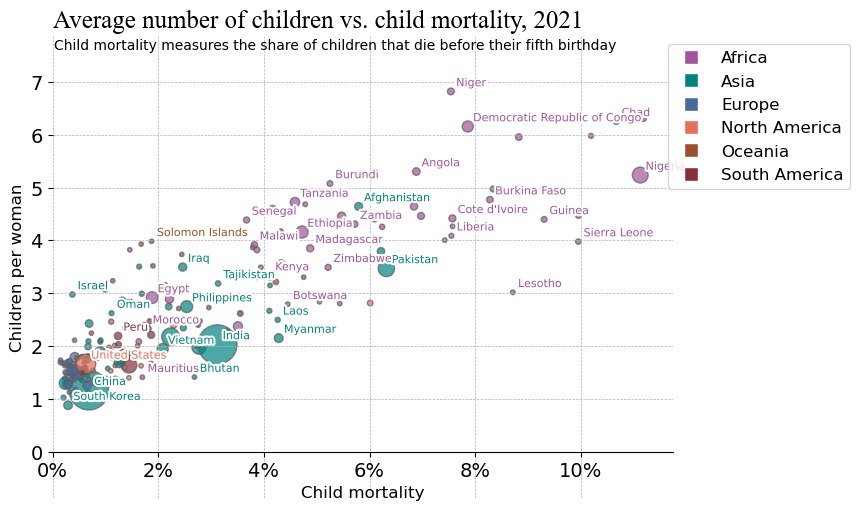

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

x = df_2021['Child mortality rate - Sex: all - Age: 0-4 - Variant: estimates']
y = df_2021['Fertility rate - Sex: all - Age: all - Variant: estimates']

volume = (pop - np.min(pop)) / (np.max(pop) - np.min(pop))*800+10 #makes the data markers reflect population size
#close = 0.003 * pop[:-2] / 0.003 * pop[:-2] 

ax.scatter(x, y, s=volume,c=color,label='2021',edgecolors='#605c5c', alpha=.7)


font = {'size'   : 12}    # default font size
plt.rc('font', **font)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

plt.xlabel('Child mortality')
plt.ylabel('Children per woman')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.axis('equal')

#Datapoint Labels From Nico
j=0 #Define j for calling correct colors later
for i in df_2021['Entity'].index: #Use index to get index numbers in dataframe
    if df_2021['Entity'][i]=='South Korea'\
    or df_2021['Entity'][i]=='China'\
    or df_2021['Entity'][i]=='United States'\
    or df_2021['Entity'][i]=='Morocco'\
    or df_2021['Entity'][i]=='Israel'\
    or df_2021['Entity'][i]=='Mayotte'\
    or df_2021['Entity'][i]=='French Guiana'\
    or df_2021['Entity'][i]=='Solomon Islands'\
    or df_2021['Entity'][i]=='Oman'\
    or df_2021['Entity'][i]=='Peru'\
    or df_2021['Entity'][i]=='Mauritius'\
    or df_2021['Entity'][i]=='British Virgin Islands'\
    or df_2021['Entity'][i]=='Bhutan'\
    or df_2021['Entity'][i]=='Vietnam'\
    or df_2021['Entity'][i]=='Egypt'\
    or df_2021['Entity'][i]=='Iraq'\
    or df_2021['Entity'][i]=='Tajikistan'\
    or df_2021['Entity'][i]=='Philippines'\
    or df_2021['Entity'][i]=='India'\
    or df_2021['Entity'][i]=='Laos'\
    or df_2021['Entity'][i]=='Myanmar'\
    or df_2021['Entity'][i]=='Botswana'\
    or df_2021['Entity'][i]=='Kenya'\
    or df_2021['Entity'][i]=='Malawi'\
    or df_2021['Entity'][i]=='Senegal'\
    or df_2021['Entity'][i]=='Tanzania'\
    or df_2021['Entity'][i]=='Ethiopia'\
    or df_2021['Entity'][i]=='Madagascar'\
    or df_2021['Entity'][i]=='Zimbabwe'\
    or df_2021['Entity'][i]=='Burundi'\
    or df_2021['Entity'][i]=='Afghanistan'\
    or df_2021['Entity'][i]=='Zambia'\
    or df_2021['Entity'][i]=='Pakistan'\
    or df_2021['Entity'][i]=='Angola'\
    or df_2021['Entity'][i]=="Cote d'Ivoire"\
    or df_2021['Entity'][i]=='Liberia'\
    or df_2021['Entity'][i]=='Niger'\
    or df_2021['Entity'][i]=='Democratic Republic of Congo'\
    or df_2021['Entity'][i]=='Burkina Faso'\
    or df_2021['Entity'][i]=='Lesotho'\
    or df_2021['Entity'][i]=='Chad'\
    or df_2021['Entity'][i]=='Nigeria'\
    or df_2021['Entity'][i]=='Guinea'\
    or df_2021['Entity'][i]=='Sierra Leone': #All contries in or list will be labeled
        plt.annotate(df_2021['Entity'][i], (x[i]+.1, y[i]+.1), fontsize=8, c=color[j],path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) #text highlight from Biviana  
    j+=1 #increment j to keep track of position in lists, for color
#got the bbox code from https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html#matplotlib.patches.FancyBboxPatch

#Removing spines and positioning
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # Move the left spine to the zero position
ax.spines['bottom'].set_position('zero')  # Move the bottom spine to the zero position

#ax.xaxis.set_major_formatter(mtick.FuncFormatter(no_percentage_formatter))

ax.set_ylim(0,7)
ax.set_xlim(xmin=0)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))#add the '%' symbol to the bottom axis 

##### Code for legend colors from Biviana

continent_colors = {
    'Africa': '#a2559c',
    'Asia': '#00847d',
    'Europe': '#4b6a9c',
    'North America': '#e56f5a',
    'Oceania': '#9a5129',
    'South America': '#883039' }
#####

##### Code for legend from Hamad

plt.legend(title='Continent')
plt.legend(fontsize=12, loc='upper left')
handles = [plt.Line2D([0], [0], marker="s", color='w', label=continent, markersize=10, markerfacecolor=color)
           for continent, color in continent_colors.items()]##https://matplotlib.org/stable/api/markers_api.html
plt.legend(handles=handles, fontsize=12, loc='upper right', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=False)
#####
plt.title('Average number of children vs. child mortality, 2021',fontname='Times New Roman', fontsize=18,loc='left')
plt.annotate('Child mortality measures the share of children that die before their fifth birthday'
             , xy=(0.455, .97), xycoords='axes fraction', fontsize=10, ha='center')

plt.show()